In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df_lyrics = pd.read_csv('lyrics.csv', index_col='index')
df_lyrics.head()

,song,year,artist,genre,lyrics
index,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [3]:
df_lyrics.shape

(362237, 5)

## Remove Null values

In [4]:
df_lyrics.isnull().sum()

song          2
year          0
artist        0
genre         0
lyrics    95680
dtype: int64

In [5]:
df_lyrics = df_lyrics.dropna(axis=0)
df_lyrics.isnull().sum()

song      0
year      0
artist    0
genre     0
lyrics    0
dtype: int64

In [6]:
df_lyrics.shape

(266556, 5)

In [7]:
df_lyrics.describe(include='all')

,song,year,artist,genre,lyrics
count,266556,266556.000000,266556,266556,266556
unique,187186,NaN,14543,12,244873
top,intro,NaN,dolly-parton,Rock,INSTRUMENTAL
freq,190,NaN,744,109235,1369
mean,NaN,2007.654909,NaN,NaN,NaN
std,NaN,10.115249,NaN,NaN,NaN
min,NaN,67.000000,NaN,NaN,NaN
25%,NaN,2006.000000,NaN,NaN,NaN
50%,NaN,2007.000000,NaN,NaN,NaN
75%,NaN,2010.000000,NaN,NaN,NaN


## Replace new line in lyrics

In [8]:
df_lyrics['lyrics'] = df_lyrics.apply(lambda x: x['lyrics'].replace('\n',' '), axis=1)
df_lyrics.head()

,song,year,artist,genre,lyrics
index,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing? You know I'm gonna cut..."
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy, it's like you seem..."
2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I [Verse 1:] If I wrote a..."
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


## Remove rows with short lyrics

In [10]:
# Replace punctuation with spaces
df_lyrics['lyrics'] = df_lyrics['lyrics'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]', ' ', x))
df_lyrics.head()

,song,year,artist,genre,lyrics
index,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,Oh baby how you doing You know I m gonna cut...
1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it s like you seem...
2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn t hard to ...
3,you-are-my-rock,2009,beyonce-knowles,Pop,Oh oh oh I oh oh oh I Verse 1 If I wrote a...
4,black-culture,2009,beyonce-knowles,Pop,Party the people the people the party it s po...


In [37]:
df_lyrics['lyrics-length'] = df_lyrics['lyrics'].apply(lambda x: len(x) - x.count(' '))
df_lyrics.head()

,song,year,artist,genre,lyrics,lyrics-length
index,,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,Oh baby how you doing You know I m gonna cut...,1442
1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it s like you seem...,967
2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn t hard to ...,644
3,you-are-my-rock,2009,beyonce-knowles,Pop,Oh oh oh I oh oh oh I Verse 1 If I wrote a...,1757
4,black-culture,2009,beyonce-knowles,Pop,Party the people the people the party it s po...,1147


In [38]:
df_lyrics.describe()

,year,lyrics-length
count,266556.000000,266556.000000
mean,2007.654909,881.684997
std,10.115249,611.445548
min,67.000000,0.000000
25%,2006.000000,509.000000
50%,2007.000000,747.000000
75%,2010.000000,1076.000000
max,2016.000000,32063.000000


In [39]:
#df_lyrics[df_lyrics['lyrics-length'] < 100].head(20)
(df_lyrics['lyrics-length'] < 100).sum()

8175

In [40]:
df_lyrics = df_lyrics[df_lyrics['lyrics-length'] > 100]
df_lyrics.describe()

,year,lyrics-length
count,258357.000000,258357.000000
mean,2007.669113,908.854647
std,10.239666,601.420612
min,67.000000,101.000000
25%,2006.000000,531.000000
50%,2007.000000,763.000000
75%,2010.000000,1090.000000
max,2016.000000,32063.000000


In [42]:
df_lyrics[df_lyrics['lyrics-length'] < 110].head(20)

,song,year,artist,genre,lyrics,lyrics-length
index,,,,,,
1003,crucified-again,2012,arcade-fire,Rock,die die burn die praise jesus praise jesus pra...,107
1808,grind-and-click,2007,earthtone9,Metal,grind and click the bomb goes off with a grind...,103
1975,dead-mountain-mouth,2007,genghis-tron,Electronic,Dead mountain mouth teeth framed by wet graves...,107
2724,god-is-coming,2007,antimatter,Rock,Judas Judas don t you want me Why can t you l...,106
3557,the-morning-after,1992,george-duke,Jazz,ooh after love the morning after the morning a...,106
4802,liquid-sky,2007,covenant,Pop,Use me use me use me I m here dont go don t ke...,108
4805,the-men,2007,covenant,Pop,We are the men Silent and cold Beautiful eyes ...,108
7170,irresistable,2012,bobby-darin,Jazz,i don t know what you got but you got me and b...,107
7713,bragging-rights,2016,azizi-gibson,Hip-Hop,You and I gon get this money you and I ain t g...,104


In [43]:
df_lyrics = df_lyrics[~df_lyrics['lyrics'].str.contains('We are not in a position to display')]
df_lyrics.describe(include='all')

,song,year,artist,genre,lyrics,lyrics-length
count,258357,258357.000000,258357,258357,258357,258357.000000
unique,180807,NaN,14353,12,240654,NaN
top,intro,NaN,dolly-parton,Rock,feat Philip Lawrence Her Heart Is Racin...,NaN
freq,136,NaN,744,106090,57,NaN
mean,NaN,2007.669113,NaN,NaN,NaN,908.854647
std,NaN,10.239666,NaN,NaN,NaN,601.420612
min,NaN,67.000000,NaN,NaN,NaN,101.000000
25%,NaN,2006.000000,NaN,NaN,NaN,531.000000
50%,NaN,2007.000000,NaN,NaN,NaN,763.000000
75%,NaN,2010.000000,NaN,NaN,NaN,1090.000000


## Remove remixes

In [45]:
df_lyrics[df_lyrics['song'].str.contains('remix', flags=re.IGNORECASE, regex=True)].head()

,song,year,artist,genre,lyrics,lyrics-length
index,,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,Oh baby how you doing You know I m gonna cut...,1442
22,beutiful-liar-remix,2007,beyonce-knowles,Pop,Ay Ay Nobody likes being played Ay Oh Be...,1232
49,irreemplazable-nortena-remix,2007,beyonce-knowles,Pop,Ya lo ves ya lo ves Te olvid te olvid mmm Y...,1488
88,run-the-world-girls-remix,2012,beyonce-knowles,Pop,Girls we run this motha Girls we run this mo...,2050
111,in-da-club-remix,2006,beyonce-knowles,Pop,No shorty it s Beyonce We gon party like it...,1812


In [46]:
df_lyrics = df_lyrics[~df_lyrics['song'].str.contains('remix', flags=re.IGNORECASE, regex=True)]
df_lyrics.describe(include='all')

,song,year,artist,genre,lyrics,lyrics-length
count,256280,256280.000000,256280,256280,256280,256280.000000
unique,178814,NaN,14317,12,240072,NaN
top,intro,NaN,dolly-parton,Rock,feat Philip Lawrence Her Heart Is Racin...,NaN
freq,136,NaN,744,105850,57,NaN
mean,NaN,2007.671254,NaN,NaN,NaN,903.839117
std,NaN,7.965039,NaN,NaN,NaN,596.603798
min,NaN,67.000000,NaN,NaN,NaN,101.000000
25%,NaN,2006.000000,NaN,NaN,NaN,530.000000
50%,NaN,2007.000000,NaN,NaN,NaN,760.000000
75%,NaN,2010.000000,NaN,NaN,NaN,1084.000000


## Fix years

In [47]:
df_lyrics[df_lyrics['year'] < 1900].head(10)

,song,year,artist,genre,lyrics,lyrics-length
index,,,,,,
27657,star,702,clipse,Hip-Hop,You re my star It s such a wonder how you shin...,1018
315540,let-s-lurk,67,giggs,Hip-Hop,Verse 1 Still pulling up on smoke Skeng in my...,369
335205,i-can-t-believe,112,faith-evans,Pop,Chorus I can t believe that love has gone aw...,870


In [48]:
df_lyrics.at[27657, 'artist'] = '702'
df_lyrics.at[27657, 'year'] = 2003

df_lyrics.at[315540, 'artist'] = 67
df_lyrics.at[315540, 'year'] = 2016

df_lyrics.at[335205, 'year'] = 2001

df_lyrics.describe(include='all')

,song,year,artist,genre,lyrics,lyrics-length
count,256280,256280.000000,256280,256280,256280,256280.000000
unique,178814,NaN,14318,12,240072,NaN
top,intro,NaN,dolly-parton,Rock,feat Philip Lawrence Her Heart Is Racin...,NaN
freq,136,NaN,744,105850,57,NaN
mean,NaN,2007.691306,NaN,NaN,NaN,903.839117
std,NaN,5.298313,NaN,NaN,NaN,596.603798
min,NaN,1968.000000,NaN,NaN,NaN,101.000000
25%,NaN,2006.000000,NaN,NaN,NaN,530.000000
50%,NaN,2007.000000,NaN,NaN,NaN,760.000000
75%,NaN,2010.000000,NaN,NaN,NaN,1084.000000


## Examine Top Lyric

**should i look at duplicates instead**

In [50]:
df_lyrics[df_lyrics['lyrics'].str.contains('Her Heart Is Racin')].head()

,song,year,artist,genre,lyrics,lyrics-length
index,,,,,,
118837,ladi6,2013,dancing-with-the-stars,Not Available,feat Philip Lawrence Her Heart Is Racin...,889
118838,daylight,2013,dancing-with-the-stars,Not Available,feat Philip Lawrence Her Heart Is Racin...,889
118839,uptight-everything-s-alright,2013,dancing-with-the-stars,Not Available,feat Philip Lawrence Her Heart Is Racin...,889
118842,footloose,2013,dancing-with-the-stars,Not Available,feat Philip Lawrence Her Heart Is Racin...,889
118843,misery,2013,dancing-with-the-stars,Not Available,feat Philip Lawrence Her Heart Is Racin...,889


In [53]:
df_lyrics[df_lyrics['lyrics'].str.contains('Her Heart Is Racin')].shape

(57, 6)

In [51]:
df_lyrics.loc[118837, 'lyrics']

'    feat  Philip Lawrence   Her Heart Is Racing  And The Room Is Heating Up And Her Eyes Are Glazing But She Still Can t Get Enough The Beat Is Bumping Now Shes Blowing Up Blowing Up The Last Thing On Her Mind is Growing Up Growing Up She ll Kiss The Sky Before Shes Giving up Giving Up Ooh Here She Comes Shes Dancing With The Stars Living In The Sky With Diamonds Ooh Shes Dancing With The Stars And Oh How The Lights Are Shining She Builds Castles With White Sand The Reflection In The Mirror Is Her Best Friend Ooh Shes Dancing With The Stars The Stars Keep Dancing You Can t Change Her Cause She Knows You Think It s Hard That Girl Knows Danger And She Don t When To Start The Beat Is Bumping Now Shes Blowing Up Blowing Up The Last Thing On Her Mind is Growing Up Growing Up She ll Kiss The Sky Before Shes Giving up Giving Up Ooh Here She Comes Shes Dancing With The Stars Living In The Sky With Diamonds Ooh Shes Dancing With The Stars And Oh How The Lights Are Shining She Builds Castles Wi

In [54]:
df_lyrics = df_lyrics[~df_lyrics['lyrics'].str.contains('feat  Philip Lawrence   Her Heart Is Racing')]
df_lyrics.describe(include='all')

,song,year,artist,genre,lyrics,lyrics-length
count,256223,256223.000000,256223,256223,256223,256223.000000
unique,178806,NaN,14318,12,240071,NaN
top,intro,NaN,dolly-parton,Rock,Have yourself a merry little Christmas Let you...,NaN
freq,136,NaN,744,105850,39,NaN
mean,NaN,2007.690305,NaN,NaN,NaN,903.842419
std,NaN,5.298473,NaN,NaN,NaN,596.670115
min,NaN,1968.000000,NaN,NaN,NaN,101.000000
25%,NaN,2006.000000,NaN,NaN,NaN,530.000000
50%,NaN,2007.000000,NaN,NaN,NaN,760.000000
75%,NaN,2010.000000,NaN,NaN,NaN,1085.000000


## Graphs

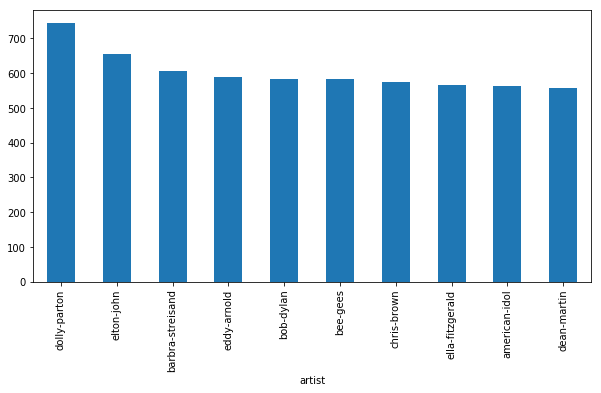

In [64]:
df_top_artists = df_lyrics.groupby('artist').size().sort_values(ascending=False).reset_index(name='songs').head(10)
df_top_artists.plot(x='artist', 
                    y='songs', 
                    kind='bar',
                    figsize=(10, 5),
                    legend=False)

plt.show()

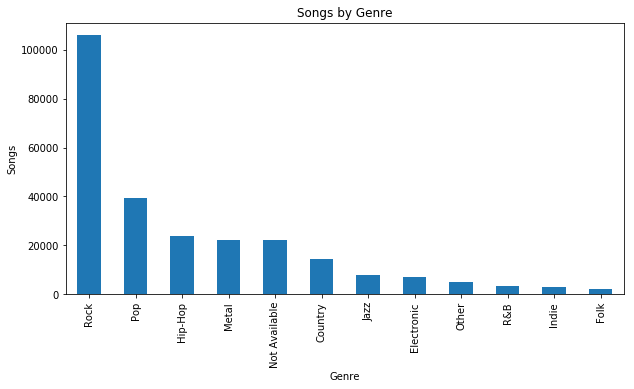

In [65]:
df_genre_count = df_lyrics.groupby('genre').size().sort_values(ascending=False).reset_index(name='songs')
df_genre_count.plot(x='genre', 
                    y='songs', 
                    kind='bar',
                    figsize=(10, 5),
                    legend=False)

plt.title('Songs by Genre')
plt.xlabel('Genre')
plt.ylabel('Songs')
plt.show()

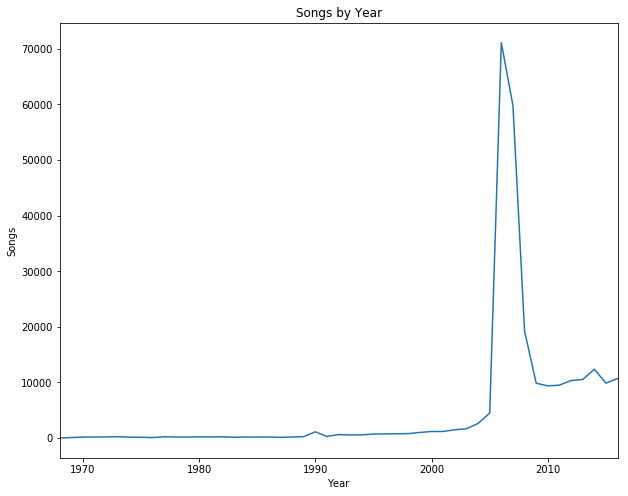

In [66]:
df_year_count = df_lyrics.groupby('year').size().reset_index(name='songs')
df_year_count.plot(x='year', 
                   y='songs', 
                   kind='line',
                   figsize=(10, 8),
                   legend=False)

plt.title('Songs by Year')
plt.xlabel('Year')
plt.ylabel('Songs')
plt.show()

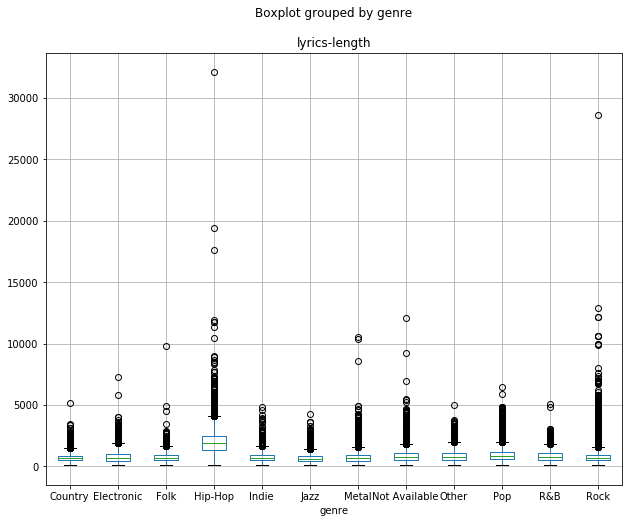

In [69]:
df_lyrics.boxplot(column='lyrics-length',
                  by='genre',
                  figsize=(10,8))